# Projeto de Série Temporal:
## Contexto Fictício
### Usando os conceitos e tecnologias de Ciência de Dados 

Usando a biblioteca "pandas" para carregar a base de dados em Excel, e a biblioteca "prophet" para fazer a previsões das vendas futuras.

Para fazer uma previsões das vendas para 5 dias, devemos seguir os seguintes passos:

Coletar dados: você precisa coletar dados históricos de vendas para fazer previsões futuras.

Preparar os dados: limpe e organize seus dados para que possam ser usados ​​para previsão. Adicione uma coluna de dados para os dados de vendas e defina o tipo de dados como o índice da tabela.

Analisar dados: explore os dados para verificar a existência de tendências, sazonalidade e irregularidades.

Treinar o modelo: escolha um modelo de previsão adequado e treine-o com os dados coletados e preparados. Por exemplo, você pode usar o modelo de série temporal "Prophet" para fazer previsão.

Fazer previsão: use o modelo treinado para fazer previsão de vendas para os próximos 5 dias.

Avaliar o modelo: avaliar a precisão do modelo comparando suas previsões com os dados reais. Ajuste o modelo se necessário.


In [ ]:
# Instalando a biblioteca 

!pip install pystan~=2.14
!pip install fbprophet==0.8
!pip install pandas fbprophet
!pip install --upgrade pip
!conda install -c conda-forge fbprophet
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement fbprophet==0.8 (from versions: 0.1.post1, 0.1.1, 0.2, 0.2.1, 0.3.post1, 0.3.post2, 0.4, 0.4.post1, 0.4.post2, 0.5, 0.6, 0.7, 0.7.1)
ERROR: No matching distribution found for fbprophet==0.8
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importando bibliotecas
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

#1.Coletar dados

In [ ]:
# Carregar a base de dados de Excel em um DataFrame
df = pd.read_excel("/content/Dados.xlsx")
df.head()

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317


# 2. Preparar os dados

In [ ]:
# alterando o index para data
df = df.set_index('Data')

In [ ]:
# ver o resultado da transformação
df.head()

,Vendas
Data,
2022-12-06,870
2022-12-07,868
2022-12-08,1189
2022-12-09,742
2022-12-10,317


In [ ]:
# ultimas 5 linhas do dataframe
ultimas_5_linhas = df.tail(5)
print(ultimas_5_linhas)

            Vendas
Data              
2023-01-16    1692
2023-01-17    1097
2023-01-18    1302
2023-01-19    1405
2023-01-20     945


In [ ]:
# Valores ausentes
print("""Quantos valores faltantes existem em cada variável?
Variável | Valores ausentes""")
df.isnull().sum()

Quantos valores faltantes existem em cada variável?
Variável | Valores ausentes


Vendas    0
dtype: int64

In [ ]:
# Valores duplicados
df.drop_duplicates(inplace = True)

In [ ]:
# Forma do conjunto de dados
print("Numero de linhas:", df.shape[0])
print("Numero de colunas: ", df.shape[1])

Numero de linhas: 44
Numero de colunas:  1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 2022-12-06 to 2023-01-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Vendas  44 non-null     int64
dtypes: int64(1)
memory usage: 704.0 bytes


In [ ]:
df.head()

,Vendas
Data,
2022-12-06,870
2022-12-07,868
2022-12-08,1189
2022-12-09,742
2022-12-10,317


In [ ]:
# Estatísticas
# As Vendas média é 763,90 e seu desvio padrão é 435,36.
# A venda minima foi de 18.
# A maior venda foi de 1692.

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Vendas,44.0,763.909091,435.365114,18.0,401.5,810.5,1065.5,1692.0


#3.Treinar o modelo  | Machine Learning Model






In [ ]:
# renomear colunas para o formato aceito pelo prophet
df = df.rename(columns={'Vendas': 'y'})
df['ds'] = df.index

# Instanciando o modelo de previsão
model = Prophet()

# Treinando o modelo com os dados de vendas
model.fit(df)

# Gerando previsões para os próximos 5 dias
future_dates = model.make_future_dataframe(periods=5)
forecast = model.predict(future_dates)

# Filtrando as previsões somente para os próximos 5 dias
forecast_5_days = forecast[['ds', 'yhat']].tail(5)

# Resultado das previsões para os próximos 5 dias
forecast_5_days = forecast_5_days.rename(columns={'ds': 'Data', 'yhat': 'Vendas'})
forecast_5_days = forecast_5_days.set_index('Data')
forecast_5_days['Vendas'] = forecast_5_days['Vendas'].round()
print("Previsão de vendas para os próximos 5 dias:")
print(forecast_5_days)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Previsão de vendas para os próximos 5 dias:
            Vendas
Data              
2023-01-21   298.0
2023-01-22   436.0
2023-01-23  1266.0
2023-01-24   951.0
2023-01-25   963.0


In [ ]:
# renomear colunas para o formato aceito pelo prophet
df = df.rename(columns={'data': 'ds', 'demand': 'y'})

# criar modelo prophet
model = Prophet()

# ajustar modelo prophet aos dados históricos
model.fit(df)

# criar dataframe com datas para fazer previsão
future = model.make_future_dataframe(periods=5)

# fazer previsão
forecast = model.predict(future)

# Resultado das previsões para os próximos 5 dias
forecast = forecast.rename(columns={'ds': 'Data', 'yhat': 'Vendas'})
forecast = forecast.set_index('Data')
forecast['Vendas'] = forecast['Vendas'].round()
print("Previsão de vendas para os próximos 5 dias:")
print(forecast.tail(5))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Previsão de vendas para os próximos 5 dias:
                 trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
Data                                                                        
2023-01-21  826.780885    5.475816   618.057280   826.778777   826.783069   
2023-01-22  830.433901  123.415654   771.514633   830.424839   830.443622   
2023-01-23  834.086918  942.150116  1599.255176   834.069077   834.107355   
2023-01-24  837.739935  620.479836  1256.572441   837.710930   837.772210   
2023-01-25  841.392951  643.653662  1281.353316   841.351275   841.438349   

            additive_terms  additive_terms_lower  additive_terms_upper  \
Data                                                                     
2023-01-21     -528.471534           -528.471534           -528.471534   
2023-01-22     -394.891072           -394.891072           -394.891072   
2023-01-23      431.475489            431.475489            431.475489   
2023-01-24      113.388661            113.3886

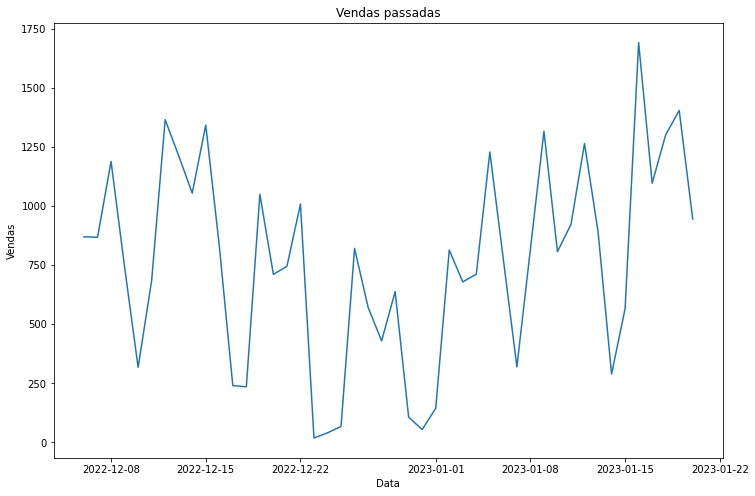

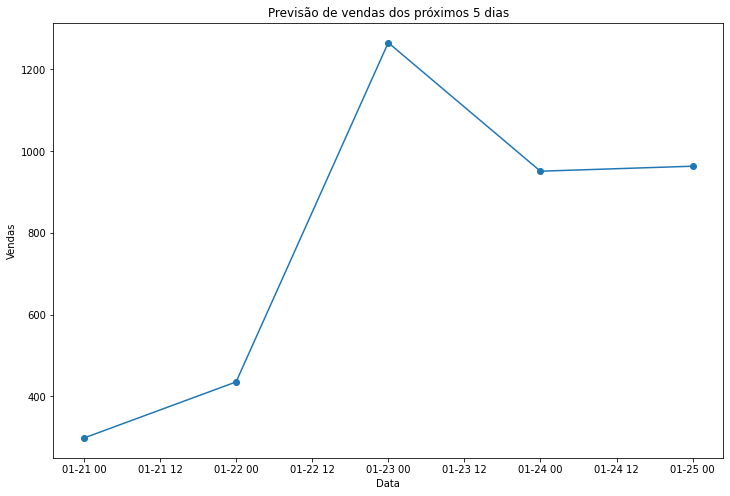

In [ ]:
#  Vendas passada
# Plot do dados atuais
plt.figure(figsize=(12,8))
plt.plot(df['ds'], df['y'])
# Adicionando título e rótulos ao gráfico
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Vendas passadas')
# Exibindo o gráfico
plt.show() 

# Plot da previsão
plt.figure(figsize=(12,8))
plt.plot(forecast_5_days['ds'], forecast_5_days['yhat'], '-o')

# Adicionando título e rótulos ao gráfico

plt.title('Previsão de vendas dos próximos 5 dias')
plt.xlabel('Data')
plt.ylabel('Vendas')

# Exibindo o gráfico
plt.show()